<a href="https://colab.research.google.com/github/Lubo7/100-tj-js-josmarmal/blob/master/Data%20analytics%20with%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning

Before we start using Pandas, we need to import it! We can import it using the following line of code (click on the cell and press Ctrl + Enter to run it):

In [ ]:
import pandas as pd

Let's download our data set from this [link](https://drive.google.com/drive/folders/19zYt8hozcc6WqE5DD8aoiN1Eunfa-3y-?usp=sharing).

It seems like we have an issue - our data is split in 4 files. Let's merge them into one dataframe.
To do this, we first need to understand how the 4 tables are linked together. We can use the .info() method to get a better understanding of the different fields, but first, let's load the data into dataframes. Fill in the variables in the cell below!

In [ ]:
# load each csv into a Pandas DataFrame object here

orders = pd.read_csv('/content/walmart-data-Orders.csv') # remember to specify the file type!
people =pd.read_csv('/content/walmart-data-People.csv')
returns = pd.read_csv('/content/walmart-data-Returns.csv')
locations = pd.read_csv('/content/walmart-data-ZipcodeCoordinates.csv')

2234   NaN
5274   NaN
8798   NaN
9146   NaN
9147   NaN
9148   NaN
9386   NaN
9387   NaN
9388   NaN
9389   NaN
9741   NaN
Name: Postal Code, dtype: float64


In [ ]:
# use the info method on each dataframe here! Remember to look out of fields which are present in multiple DataFrames to merge them later on
orders.info()
people.info()
returns.info()
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

<details>
<summary>Advanced Challenge 🔥</summary>
<br>
Writing code that uses the same method 4 times is boring... Let's make a loop that takes a list of dataframes and runs the info method for each dataframe in the list! Feel free to add some more code cells below if you want to attempt this.
</details>


In [ ]:
dataframes_list = [orders, people, returns, locations]

for df in dataframes_list:
  print("Summary for DataFrame:", df)
  df.info()
  print("=" * 50)

Summary for DataFrame:       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2019-152156   11/8/2019  11/11/2019    Second Class   
1          2  CA-2019-152156   11/8/2019  11/11/2019    Second Class   
2          3  CA-2019-138688   6/12/2019   6/16/2019    Second Class   
3          4  US-2018-108966  10/11/2018  10/18/2018  Standard Class   
4          5  US-2018-108966  10/11/2018  10/18/2018  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2017-110422   1/21/2017   1/23/2017    Second Class   
9990    9991  CA-2020-121258   2/26/2020    3/3/2020  Standard Class   
9991    9992  CA-2020-121258   2/26/2020    3/3/2020  Standard Class   
9992    9993  CA-2020-121258   2/26/2020    3/3/2020  Standard Class   
9993    9994  CA-2020-119914    5/4/2020    5/9/2020    Second Class   

     Customer ID     Customer Name    Segment Country/Region             City  \
0       CG-12520       Claire G

Notice how, even though we can join locations to orders through the **Postal Code** field, they are not of the same data type. This will lead to issues when merging, so we need to address it ASAP! Lets convert the **Postal Code** field in **orders** to an integer so they match. You can run the cell below to do this. Give it a read while you're at it, we'll go over what these square brackets mean later!

In [ ]:
import math
non_finite_values = orders['Postal Code'][~orders['Postal Code'].apply(lambda x: isinstance(x, (int, float)) and not math.isnan(x))]
print(non_finite_values)


Series([], Name: Postal Code, dtype: int64)


In [ ]:
orders = orders[~orders['Postal Code'].isna()]
orders['Postal Code'].fillna(0, inplace=True)
orders['Postal Code'] = orders['Postal Code'].astype('int64')


<ipython-input-120-b4296aa2e759>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Postal Code'].fillna(0, inplace=True)


In [ ]:
orders['Postal Code'] = orders['Postal Code'].astype('int64')

Lets merge the 4 dataframes together. We can start with **orders**, as it contains the most data, and we can enrich it with more detail from the remaining 3 tables. Have a look at the documentation for the [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) method in the Pandas documentation.

In [ ]:
master_df = orders.merge()

<details>
<summary>Hint</summary>
<br>
There's no rush here! No need to do everything in one line of code - you can address each merge individually.

We will need to pass a few arguments to make this work:

- how='left' -> this specifies the [type of join](https://www.w3schools.com/sql/sql_join.asp), a.k.a SQL join
- on='column_name' -> this specifies the column to join on. You need to replace column_name with the name of the column you want to join on
</details>

In [ ]:
master_df = orders.merge(people, on='Region', how='left')

In [ ]:
master_df = master_df.merge(returns, on='Order ID', how='left')

In [ ]:
master_df = master_df.merge(locations, on='Postal Code', how='left')

Now that we have our Master DataFrame, we should look at whether we have any null. Let's run the cell below - it chains 2 methods together: isna, which returns a boolean DataFrame indicating whether each cell contains missing values (i.e., 1 for a null, and 0 otherwise), and sum, which adds up the True values in the boolean DataFrame, presenting the total number of nulls for each column.

In [ ]:
# Check for null values in the master DataFrame
null_counts = master_df.isnull().sum()

# Identify columns with null values
columns_with_nulls = null_counts[null_counts > 0].index

print("Columns with null values:")
print(columns_with_nulls)


Columns with null values:
Index(['Returned', 'latitude', 'longitude'], dtype='object')


In [ ]:
master_df.isna().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country/Region       0
City                 0
State                0
Postal Code          0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Person               0
Returned          9183
latitude           702
longitude          702
dtype: int64

We can divide these numbers by the length of the DataFrame to get a percentage of the total number of rows that have missing values for each column.

In [ ]:
master_df.isna().sum() / len(master_df)

Row ID            0.000000
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Ship Mode         0.000000
Customer ID       0.000000
Customer Name     0.000000
Segment           0.000000
Country/Region    0.000000
City              0.000000
State             0.000000
Postal Code       0.000000
Region            0.000000
Product ID        0.000000
Category          0.000000
Sub-Category      0.000000
Product Name      0.000000
Sales             0.000000
Quantity          0.000000
Discount          0.000000
Profit            0.000000
Person            0.000000
Returned          0.740027
latitude          0.056572
longitude         0.056572
dtype: float64

We seem to have nulls in 2 columns: **Postal Code** and **Returned**. While there are a lot of nulls for the **Returned** columns, there aren't that many for **Postal Code**, so let's drop the rows with nulls for **Postal Code**. Use the [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) method to do this. If you mess up and drop too many rows accidentally, just run all the cells from the top of the notebook!

<details>
<summary>Hint</summary>
<br>
We once again need some extra arguments. Have a look at subset. Depending on how you write your code, you might also need to use inplace=True.
</details>

In [ ]:
# Drop rows with null values in specific columns
columns_to_check = ['latitude', 'longitude', 'Postal Code']  # Add column names
master_df = master_df.dropna(subset=columns_to_check)

# Display the cleaned DataFrame without null values
print(master_df)


       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0           1  CA-2019-152156   11/8/2019  11/11/2019    Second Class   
1           2  CA-2019-152156   11/8/2019  11/11/2019    Second Class   
2           3  CA-2019-138688   6/12/2019   6/16/2019    Second Class   
3           4  US-2018-108966  10/11/2018  10/18/2018  Standard Class   
4           5  US-2018-108966  10/11/2018  10/18/2018  Standard Class   
...       ...             ...         ...         ...             ...   
12404    9992  CA-2020-121258   2/26/2020    3/3/2020  Standard Class   
12405    9993  CA-2020-121258   2/26/2020    3/3/2020  Standard Class   
12406    9993  CA-2020-121258   2/26/2020    3/3/2020  Standard Class   
12407    9993  CA-2020-121258   2/26/2020    3/3/2020  Standard Class   
12408    9994  CA-2020-119914    5/4/2020    5/9/2020    Second Class   

      Customer ID    Customer Name    Segment Country/Region             City  \
0        CG-12520      Claire Gute   Consu

In order to understand how to fill the nulls in the **Returned** column, we need to get a better understanding of what it looks like with the nulls. Let's I have a suspicion I know what happened - let's look at the different [value counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) in the column.

In [ ]:
import pandas as pd

# Get the value counts in the 'Returned' column, including null values
returned_value_counts = master_df['Returned'].value_counts(dropna=False)

# Display the value counts
print(returned_value_counts)


No     8581
Yes    3126
Name: Returned, dtype: int64


It seems like we only have **Yes** values. This makes sense given that this column comes from the joining of the Returns fataframe, which only contains information on orders that were returned. This means that it is safe to fill these missing values with **No**. Since this is our last exercise in the Data Cleaning section, try searching through the documentation on your own - Google is your best friend here!

<details>
<summary>Solution</summary>
<br>
You need the
fillna
method! You'll need to specify the column you're targeting, as well as what you're filling the nulls with.
</details>

In [ ]:
# Substitute null values in the 'Returned' column with 'No'
master_df['Returned'].fillna('No', inplace=True)

# Display the DataFrame with null values replaced by 'No'
print(master_df)


       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0           1  CA-2019-152156   11/8/2019  11/11/2019    Second Class   
1           2  CA-2019-152156   11/8/2019  11/11/2019    Second Class   
2           3  CA-2019-138688   6/12/2019   6/16/2019    Second Class   
3           4  US-2018-108966  10/11/2018  10/18/2018  Standard Class   
4           5  US-2018-108966  10/11/2018  10/18/2018  Standard Class   
...       ...             ...         ...         ...             ...   
12404    9992  CA-2020-121258   2/26/2020    3/3/2020  Standard Class   
12405    9993  CA-2020-121258   2/26/2020    3/3/2020  Standard Class   
12406    9993  CA-2020-121258   2/26/2020    3/3/2020  Standard Class   
12407    9993  CA-2020-121258   2/26/2020    3/3/2020  Standard Class   
12408    9994  CA-2020-119914    5/4/2020    5/9/2020    Second Class   

      Customer ID    Customer Name    Segment Country/Region             City  \
0        CG-12520      Claire Gute   Consu

<ipython-input-159-757927f4bf89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['Returned'].fillna('No', inplace=True)


# Exploratory Data Analysis

Now that our data is clean, let's get to know it a bit better. In this section, we'll use Seaborn to make some simple plots to explore the patterns in our data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's start by making some bar plots. Run the cell below to create a plot of the count of orders delivered through the different **Shipping Modes**.

<Axes: xlabel='Ship Mode', ylabel='count'>

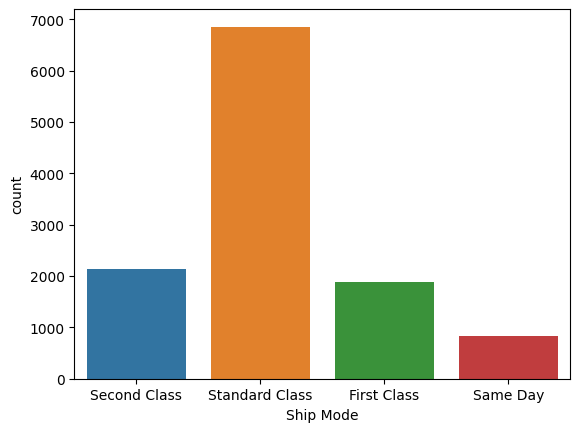

In [ ]:
sns.countplot(x='Ship Mode', data=master_df)

<Axes: xlabel='Segment', ylabel='count'>

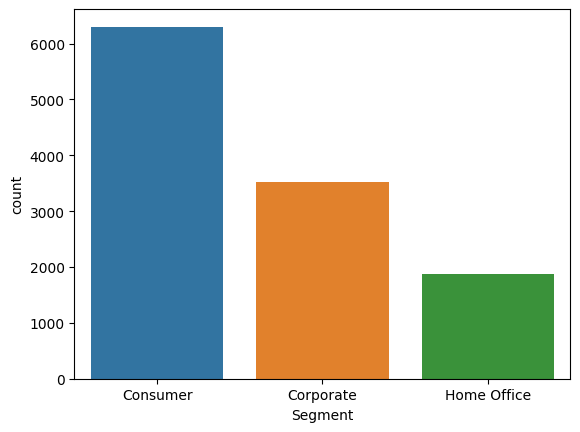

In [ ]:
sns.countplot(x='Segment', data=master_df)

<Axes: xlabel='Category', ylabel='count'>

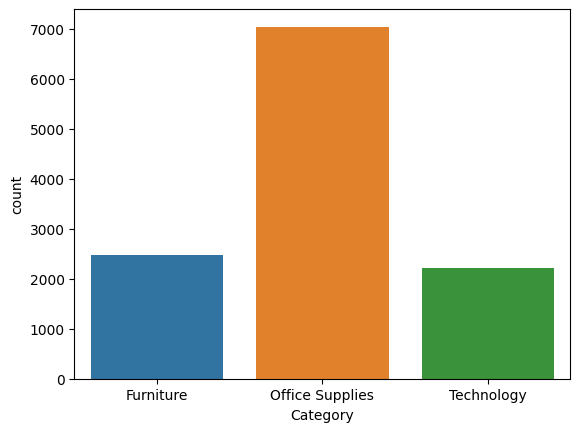

In [ ]:
sns.countplot(x='Category', data=master_df)

<Axes: xlabel='Region', ylabel='count'>

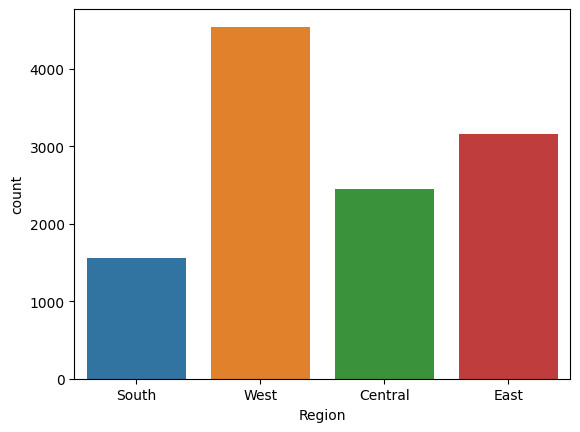

In [ ]:
sns.countplot(x='Region', data=master_df)

Let's repeat this plot for **Segment**, **Category** and **Region**. How should we edit the method?

<details>
<summary>Advanced Challenge 🔥</summary>
<br>
Here we go again with the repetition... Let's make another loop! Create a list of column headers and iterate through them, creating a plot every time.
</details>

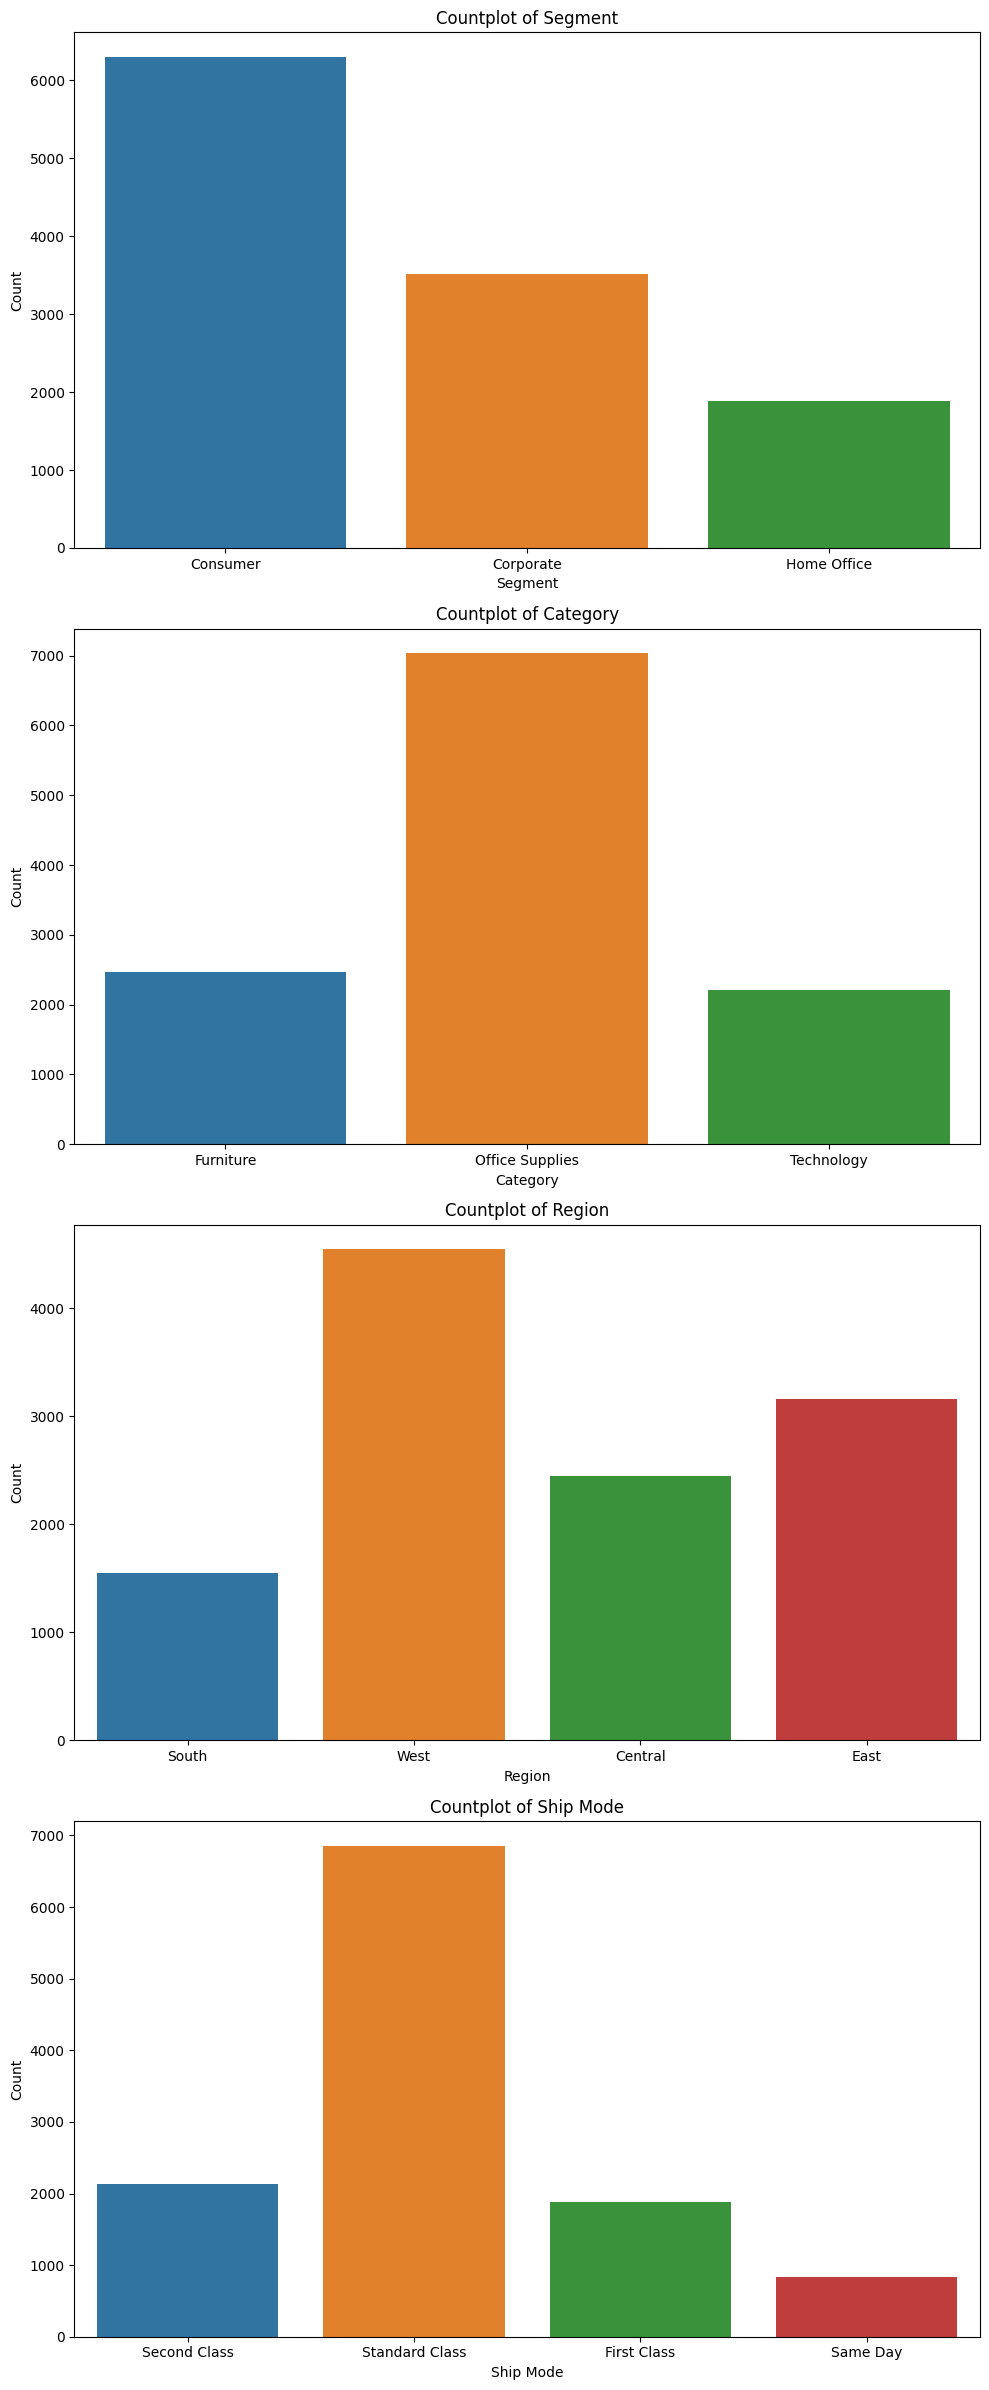

In [ ]:
# List of categorical columns
categorical_columns = ['Segment', 'Category', 'Region', 'Ship Mode']

# Create subplots for each categorical column
num_rows = len(categorical_columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, num_rows * 6))  # Adjust figsize as needed

# Loop through categorical columns and create countplots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=master_df, x=col, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


What does the cell below do?

<Axes: xlabel='Region', ylabel='count'>

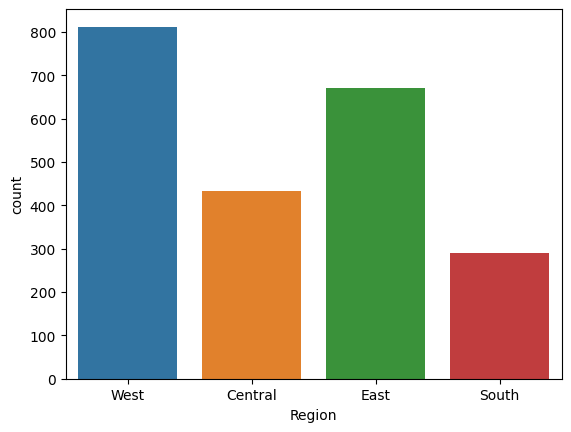

In [ ]:
tech_df = master_df[master_df['Category'] == 'Technology']
sns.countplot(x='Region', data=tech_df)

<details>
<summary>Solution</summary>
<br>
In this case we are looking at the number of orders per region, but only for orders in the "Technology" category. Notice the line of code inside the first set of square brackets. Read it as:
"Rows in master_df where the value in the 'Category' column is 'Technology'".
This is called boolean indexing, sometimes referred to as masking.
</details>

While these plots are very cool and easy to make, we're not only limited to visual representations of data. We can also use Python and Pandas to do some calculations and access information about our dataset. Let's look at the lines of code below and see what they do.

The simplest pandas method for EDA is **describe()**. It returns a table with descriptive statistics for all numeric columns.

In [ ]:
master_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,latitude,longitude
count,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000
mean,4970.973264,58795.974118,233.512379,3.785000,0.156070,28.010503,37.790935,-96.324571
std,2894.087156,32691.072464,620.070613,2.227338,0.206972,249.776959,5.143919,17.672196
min,1.000000,1453.000000,0.444000,1.000000,0.000000,-6599.978000,25.452870,-123.123930
25%,2435.500000,28205.000000,17.904000,2.000000,0.000000,1.962000,34.006920,-117.735110
50%,5095.000000,65807.000000,55.480000,3.000000,0.200000,9.017100,38.812170,-92.397250
75%,7379.000000,90049.000000,211.606000,5.000000,0.200000,29.006800,40.795270,-81.443290
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,48.790830,-73.374760


In [ ]:
master_df['Region'].value_counts()

West       4547
East       3158
Central    2449
South      1553
Name: Region, dtype: int64

<details>
<summary>Solution</summary>
<br>
This one's pretty simple! It returns the total number of orders made in each region.
</details>

In [ ]:
master_df[master_df['State'] == 'New York']['City'].unique()

array(['New York City', 'Troy', 'New Rochelle', 'Auburn', 'Lindenhurst',
       'Rochester', 'Mount Vernon', 'Oceanside', 'Yonkers', 'Buffalo',
       'Long Beach', 'Niagara Falls', 'Jamestown', 'Hempstead', 'Rome',
       'Utica'], dtype=object)

<details>
<summary>Solution</summary>
<br>
Cities in the state of New York where orders were made.
</details>

In [ ]:
master_df['State'].value_counts().head(10)

California      3021
New York        1456
Texas           1073
Washington       662
Ohio             550
Illinois         535
Pennsylvania     517
Florida          374
Michigan         270
Tennessee        264
Name: State, dtype: int64

<details>
<summary>Solution</summary>
<br>
Top 10 states with the most orders.
</details>

The possibilities here are almost endless! Try using the cell below to find 3 other values you're curious about. Maybe the cities the generate the highest profit? Or the category which has the greatest amount of total sales?

Are there any significant outliers in the sales or profit columns?

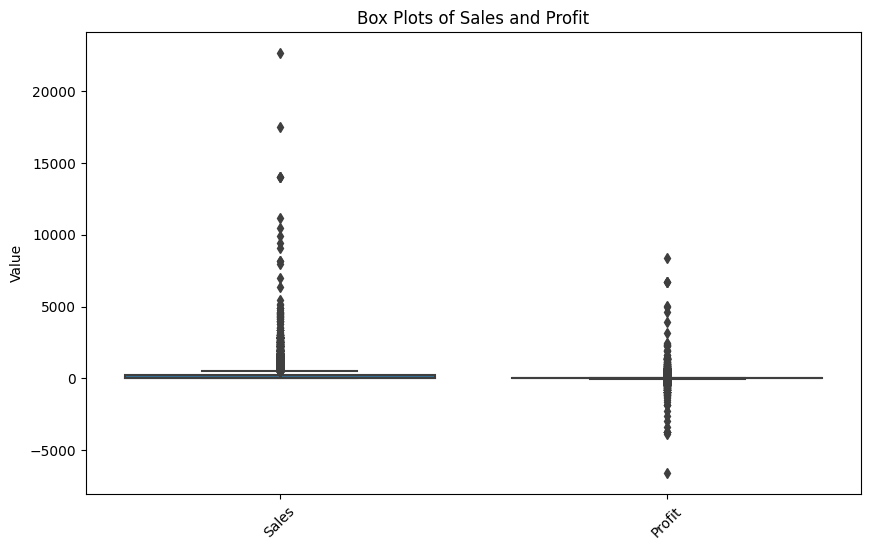

In [ ]:
# Select the columns of interest ('Sales' and 'Profit')
columns_of_interest = ['Sales', 'Profit']

# Create box plots to visualize potential outliers
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
sns.boxplot(data=master_df[columns_of_interest])
plt.title('Box Plots of Sales and Profit')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


Are there segments or regions that tend to contribute more to sales or profits?

In [ ]:
# Group by 'Segment' and calculate total sales and profits for each segment
segment_sales_profits = master_df.groupby('Segment')[['Sales', 'Profit']].sum()

# Group by 'Region' and calculate total sales and profits for each region
region_sales_profits = master_df.groupby('Region')[['Sales', 'Profit']].sum()

print("Total Sales and Profits by Segment:")
print(segment_sales_profits)

print("\nTotal Sales and Profits by Region:")
print(region_sales_profits)


Total Sales and Profits by Segment:
                    Sales       Profit
Segment                               
Consumer     1.468301e+06  178477.8592
Corporate    8.264429e+05  102135.3437
Home Office  4.389850e+05   47305.7549

Total Sales and Profits by Region:
                Sales       Profit
Region                            
Central  5.204544e+05   18257.6414
East     8.056914e+05  111343.5245
South    3.826846e+05   37659.7839
West     1.024899e+06  160658.0080


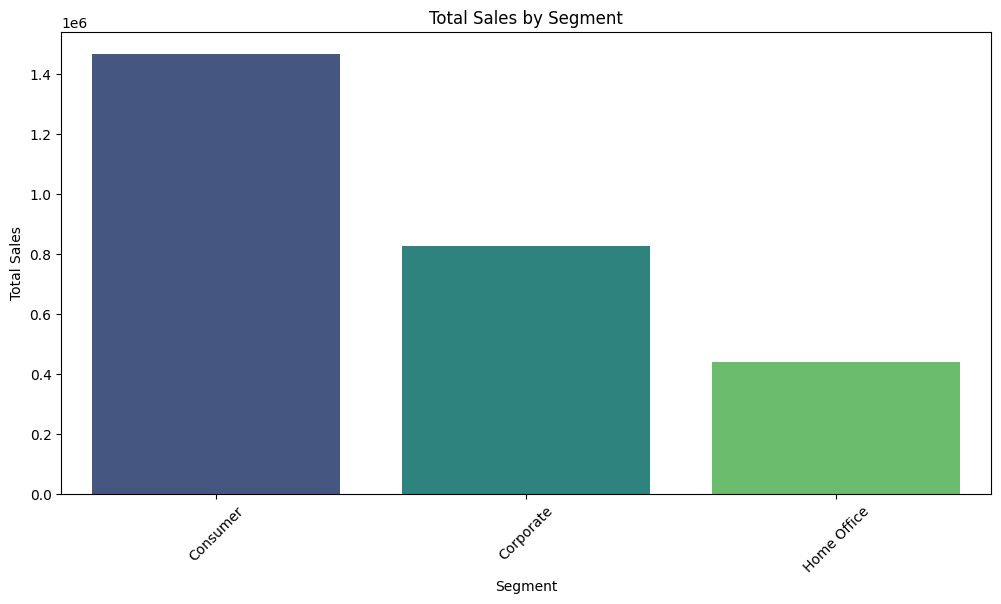

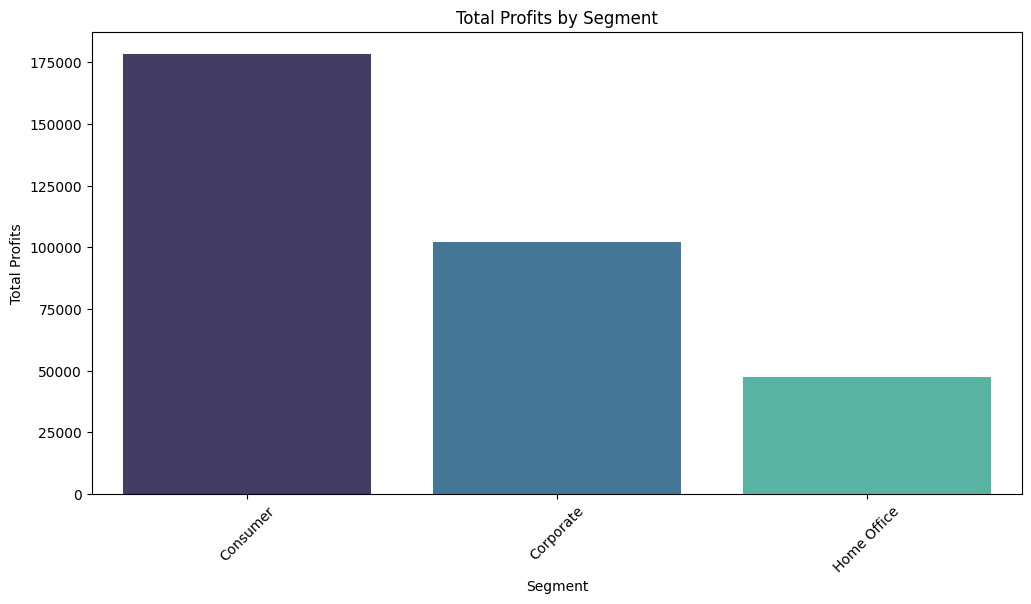

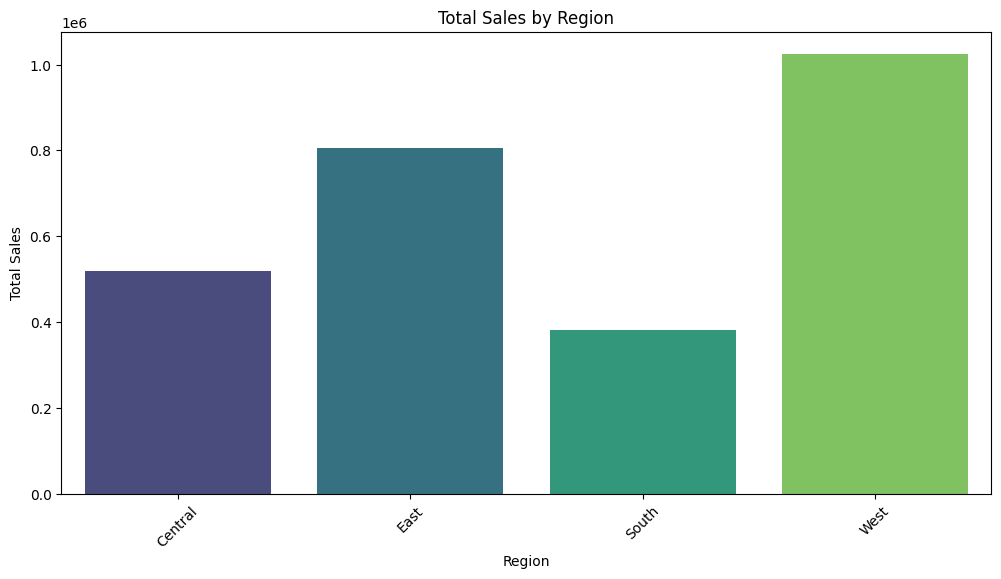

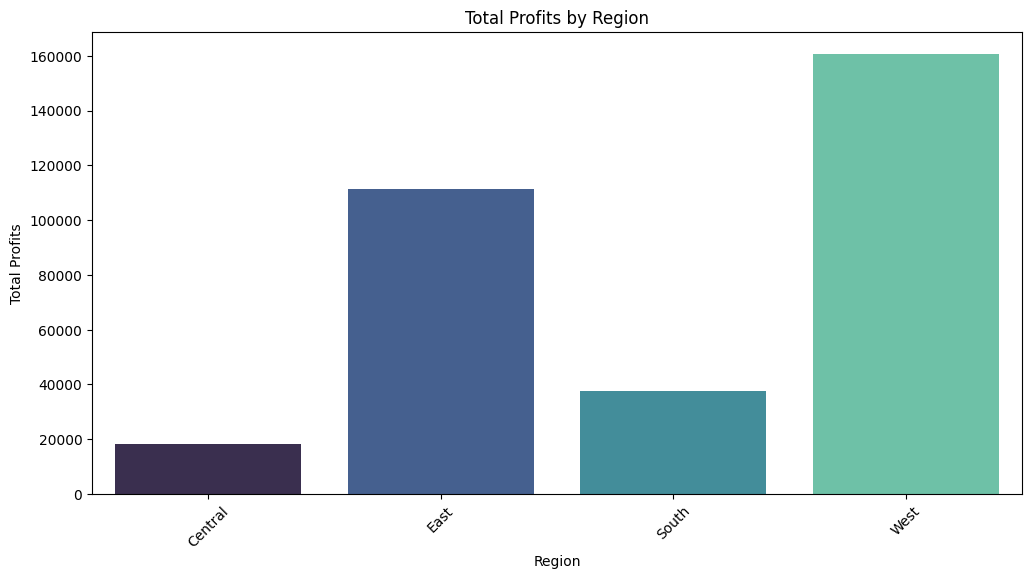

In [ ]:
# Create bar plots for total sales and profits by segment and region
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_sales_profits.reset_index(), x='Segment', y='Sales', palette='viridis')
plt.title('Total Sales by Segment')
plt.ylabel('Total Sales')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=segment_sales_profits.reset_index(), x='Segment', y='Profit', palette='mako')
plt.title('Total Profits by Segment')
plt.ylabel('Total Profits')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales_profits.reset_index(), x='Region', y='Sales', palette='viridis')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales_profits.reset_index(), x='Region', y='Profit', palette='mako')
plt.title('Total Profits by Region')
plt.ylabel('Total Profits')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()
